In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Set the font in the graphs
plt.rcParams["font.family"] = 'times new roman'
plt.rcParams['mathtext.default'] = 'regular'
import myokit
import matplotlib.colors as clrs
import matplotlib.cm as cm

import matplotlib.patheffects as pe
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D


# The cmap is an array with the colors
def prepare_cmap(cmin = -50, cmax = 200):
    # Prepare the color map 
    cmap = cm.get_cmap('RdYlBu_r', 500)
    
    color_min = cmap(0)
    color_max = cmap(500)
    pos_0 = -cmin/(cmax-cmin)
    color_0 = cmap(0.5)
    cmap = clrs.LinearSegmentedColormap.from_list('custom diverging', 
                                                 [(0,    color_min),
                                                  (pos_0, color_0),
                                                  (1,    color_max)], N=500)

    newcolors = cmap(np.linspace(0, 1, 500))
    index_0 = int(-cmin / (cmax-cmin) * 500)
    newcolors[index_0 - 1 : index_0 + 1] = [0, 0, 0, 0]
    newcmp = clrs.ListedColormap(newcolors)
    
    return newcmp

cmin = -50
cmax = 200
newcmp = prepare_cmap(cmin, cmax)


/var/folders/mm/v3pbmw2545s_1t9lbf180j1h0000gp/T/ipykernel_1559/1370015413.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlBu_r', 500)


In [3]:
# Load the model predictions
models = ['Bartolucci_2020', 'Grd_10_endo', 'Grd_Mann_endo', 'ORd_CiPA', 'ORd_Endo', 'ORd_Krogh', 'ORd_Mann', 'Tomek_Endo', 
          'TT04', 'TT06_Endo', 'TT06_Mann']
model_labels = ['BPS', 'GPB', 'GPB-M', 'ORd-CiPA', 'ORd', 'ORd-KM', 
                'ORd-M', 'ToR-ORd', 'TNNP', 'TP','TP-M']

# Initialise the outputs variable
maps_2D = np.zeros((len(models), 101, 101))

# Load all the simulation outputs
for m, model in enumerate(models):
    for ikr in range(101):
        try:
            loaded = np.loadtxt(model + '/ikr_' + str(ikr/100) + '.csv')
            maps_2D[m, :, ikr] = loaded
        except:
            print(model + '/ikr_' + str(ikr/100) + '.csv could not be found.')

In [7]:
# Compute the experimental surface
def surface(x, y, theta):
    return theta[0] * x**2  + theta[1] * y**2 + theta[2]*x*y + theta[3]*x + theta[4]*y + theta[5] * x**3 + theta[6] * y**3 + theta[7]*x**2*y + theta[8]*y**2*x 
    
# Report the quadratic surfaces fitted previously to the experimental data points (with script Visualization of Experimental Data/plot 2D map of experimental DAPD.ipynb)
theta_CiPA = [ 3.31901936e-03,  1.83675832e-02, -1.50052955e-02,  3.04923773e-01, -4.39749512e-01,  1.43191411e-04, -2.78594673e-04, -3.23744663e-04, 3.98002371e-04]
theta_Pharm = [ 3.31901936e-03,  1.83675832e-02, -1.50052955e-02,  3.04923773e-01, -4.39749512e-01,  1.43191411e-04, -2.78594673e-04, -3.23744663e-04, 3.98002371e-04]
theta_CiPA_percent = [ 3.31901936e-03,  1.83675832e-02, -1.50052955e-02,  3.04923773e-01, -4.39749512e-01 , 1.43191411e-04, -2.78594673e-04, -3.23744663e-04, 3.98002371e-04]
theta_Pharm_percent = [ 3.30415818e-03,  1.34000410e-02, -1.21965211e-02,  3.44841310e-01, -5.44787455e-01 , 4.18098708e-05, -1.39526583e-04, -1.32772982e-04, 2.03221165e-04]

x = np.linspace(0, 100, 101)
y = np.linspace(0, 100, 101)
surface_CiPA = np.transpose(surface(x[:, None], y, theta_CiPA))
surface_Pharm = np.transpose(surface(x[:, None], y, theta_Pharm))
surface_CiPA_percent = np.transpose(surface(x[:, None], y, theta_CiPA_percent))
surface_Pharm_percent = np.transpose(surface(x[:, None], y, theta_Pharm_percent))


<>:84: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\m'
<>:130: SyntaxWarning: invalid escape sequence '\m'
<>:133: SyntaxWarning: invalid escape sequence '\m'
<>:150: SyntaxWarning: invalid escape sequence '\l'
<>:150: SyntaxWarning: invalid escape sequence '\g'
<>:151: SyntaxWarning: invalid escape sequence '\m'
<>:84: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\m'
<>:130: SyntaxWarning: invalid escape sequence '\m'
<>:133: SyntaxWarning: invalid escape sequence '\m'
<>:150: SyntaxWarning: invalid escape sequence '\l'
<>:150: SyntaxWarning: invalid escape sequence '\g'
<>:151: SyntaxWarning: invalid escape sequence '\m'
/var/folders/mm/v3pbmw2545s_1t9lbf180j1h0000gp/T/ipykernel_1559/212776203.py:84: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('% $\mathregular{I_{CaL}}$ in

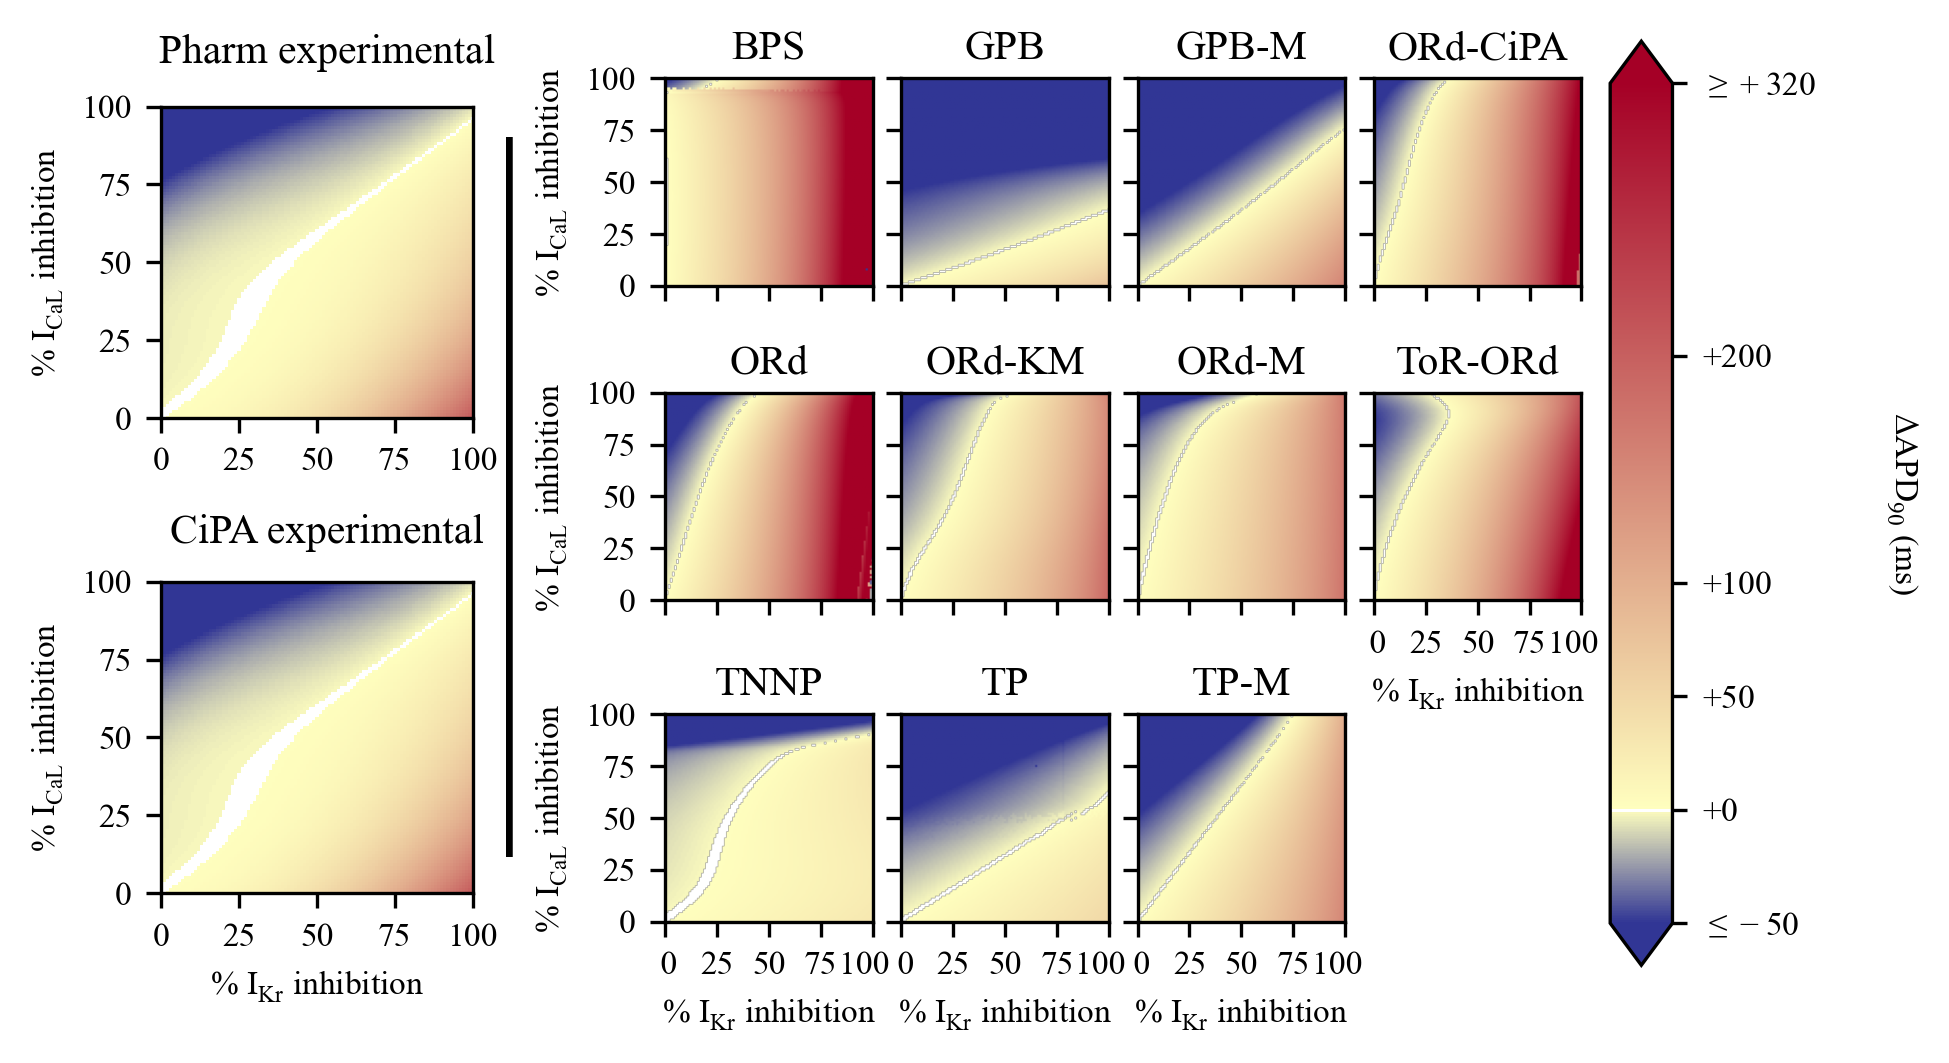

In [8]:
# Plot the 2D maps
def plot_2D_map(model, ax=None, cmin = -50, cmax = 200, xlabel=False, ylabel=False, write_model=False):
    # Axes to plot in
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize = (6, 6))

    # Label axes
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks([0, 25, 50, 75, 100])
    if xlabel:
        ax.set_xlabel('I$_{Kr}$ inhibition in %', fontsize = 20)
    if ylabel:
        ax.set_ylabel('I$_{CaL}$ inhibition in %', fontsize = 20)

    # Flip the table so that the APD at baseline is in (0, 0)
    to_plot = np.flipud(np.fliplr(maps_2D[m]))
    APD_baseline = to_plot[0, 0]
    image=ax.imshow(to_plot - APD_baseline, cmap = newcmp, vmin = cmin, vmax = cmax)
    
    # Add the label of the model
    if write_model:
        t = ax.text(x=50, y = 85, s=model_labels[model], ha = 'center', va = 'center', fontsize = 10)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
        
    return image


# Adjust the colormap
cmax = 320
cmin = -50
newcmp = prepare_cmap(cmin, cmax)

# Plot all the maps in one figure
mosaic = [['Pharm exp', 'blank', model_labels[0], model_labels[1], model_labels[2], model_labels[3], 'legend'],
          ['Pharm exp', 'blank', model_labels[0], model_labels[1], model_labels[2], model_labels[3], 'legend'],
          ['Pharm exp', 'blank', model_labels[4], model_labels[5], model_labels[6], model_labels[7], 'legend'],
          ['CiPA exp', 'blank', model_labels[4], model_labels[5], model_labels[6], model_labels[7], 'legend'],
          ['CiPA exp', 'blank', model_labels[8], model_labels[9], model_labels[10], 'unused_0', 'legend'],
          ['CiPA exp', 'blank', model_labels[8], model_labels[9], model_labels[10], 'unused_0', 'legend']]

gs_kw = dict(width_ratios=[1.5, 0.65, 1, 1, 1, 1, 0.3], height_ratios=[0.9, 1, 1, 1, 1, 1])
fig, axes = plt.subplot_mosaic(mosaic, figsize = (6.5, 4), gridspec_kw=gs_kw, constrained_layout = False)
fig.set_dpi(300)
fig.patch.set_facecolor('w')
#fig, axes = plt.subplots(4, 4, figsize = (45, 40))

labelsize = 8
ticksize = 8
tagsize = 10

# Add a separating line
ax = axes['blank']
ax.axis('off')

# new clear axis overlay with 0-1 limits
ax2 = plt.axes([0.302, 0.2, 0.1, 0.6], facecolor=(1,1,1,0))
line = Line2D([0, 0], [0, 1], linewidth=3, color='k', alpha=1)
ax2.add_line(line)
ax2.axis('off')


######
### EXPERIMENTAL
######
# Pharm
ax = axes['Pharm exp']

# Flip the table so that the APD at baseline is in (0, 0)
to_plot = surface_Pharm
APD_baseline = to_plot[0, 0]
image=ax.imshow(to_plot - APD_baseline, cmap = newcmp, vmin = cmin, vmax = cmax)

# Add the label
plt.figtext(0.21, 0.87, 'Pharm experimental', ha= 'center', va = 'center', fontsize = tagsize)

# Label axes
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.tick_params(labelsize = ticksize)
ax.set_ylabel('% $\mathregular{I_{CaL}}$ inhibition', fontsize = labelsize)
    
# CiPA
ax = axes['CiPA exp']

# Flip the table so that the APD at baseline is in (0, 0)
to_plot = surface_CiPA
APD_baseline = to_plot[0, 0]
image=ax.imshow(to_plot - APD_baseline, cmap = newcmp, vmin = cmin, vmax = cmax)

# Add the label
plt.figtext(0.21, 0.47, 'CiPA experimental', ha= 'center', va = 'center', fontsize = tagsize)

# Label axes
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.tick_params(labelsize = ticksize)
ax.set_ylabel('% $\mathregular{I_{CaL}}$ inhibition', fontsize = labelsize)
ax.set_xlabel('% $\mathregular{I_{Kr}}$ inhibition', fontsize = labelsize)
    
######
### SIMULATED
######
for m, mod in enumerate(model_labels):
    # Define the axes
    ax = axes[mod]
    #ax = axes[m//4, m%4]
    
    # 2D map
    image = plot_2D_map(m, ax=ax, write_model = False, cmin = cmin, cmax = cmax)
    
    # Add the label of the model
    ax.text(x=50, y = 105, s=model_labels[m], ha = 'center', va = 'bottom', fontsize = tagsize)
    
    # Label axes
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_xticklabels(['', '', '', '', ''])
    ax.set_yticklabels(['', '', '', '', ''])
    ax.set_yticks([0, 25, 50, 75, 100])
    ax.tick_params(labelsize = ticksize)

    # Label first colum
    if m%4 == 0:
        ax.set_yticklabels([0, 25, 50, 75, 100])
        ax.set_ylabel('% $\mathregular{I_{CaL}}$ inhibition', fontsize = labelsize)
    if m > len(model_labels)-5:
        ax.set_xticklabels([' 0', 25, 50, 75, '100  '])
        ax.set_xlabel('% $\mathregular{I_{Kr}}$ inhibition', fontsize = labelsize)
        
# For unused axes
for m in range(len(model_labels), 12):
    ax = axes['unused_' + str(m - len(model_labels))]
    #ax = axes[m//4, m%4]
    ax.axis('off')

# Add the legend
ax = axes['legend']
norm = plt.Normalize(cmin, cmax)

sm =  ScalarMappable(norm=norm, cmap=newcmp)
sm.set_array([])

cbar = fig.colorbar(sm, extend = 'both', cax = ax, shrink = 1)
cbar.set_ticks([-50, 0, 50, 100, 200, 320])
cbar.ax.set_yticklabels(['$\leq -50$', '$+0$', '$+50$', '$+100$', '$+200$', '$\geq +320$'], fontsize = ticksize)
cbar.set_label('$\mathregular{\Delta APD_{90}}$ (ms)', rotation=270, fontsize = labelsize, labelpad = 25)

# Tight layout and save
#axes['ToR-ORd 2020'].set_in_layout(False)
#plt.tight_layout()
plt.subplots_adjust(wspace = 0.15)
plt.savefig('2-D maps of all models.png', dpi = 300)
plt.savefig('2-D maps of all models.pdf', format = 'pdf', transparent=True)


# Compare the predictions as percentage of APD change from baseline

<>:100: SyntaxWarning: invalid escape sequence '\m'
<>:117: SyntaxWarning: invalid escape sequence '\m'
<>:118: SyntaxWarning: invalid escape sequence '\m'
<>:144: SyntaxWarning: invalid escape sequence '\m'
<>:147: SyntaxWarning: invalid escape sequence '\m'
<>:164: SyntaxWarning: invalid escape sequence '\l'
<>:164: SyntaxWarning: invalid escape sequence '\g'
<>:100: SyntaxWarning: invalid escape sequence '\m'
<>:117: SyntaxWarning: invalid escape sequence '\m'
<>:118: SyntaxWarning: invalid escape sequence '\m'
<>:144: SyntaxWarning: invalid escape sequence '\m'
<>:147: SyntaxWarning: invalid escape sequence '\m'
<>:164: SyntaxWarning: invalid escape sequence '\l'
<>:164: SyntaxWarning: invalid escape sequence '\g'
/var/folders/mm/v3pbmw2545s_1t9lbf180j1h0000gp/T/ipykernel_1559/1782609820.py:100: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('% $\mathregular{I_{CaL}}$ inhibition', fontsize = label_size)
/var/folders/mm/v3pbmw2545s_1t9lbf180j1h0000gp/T/ipykernel_1559/17

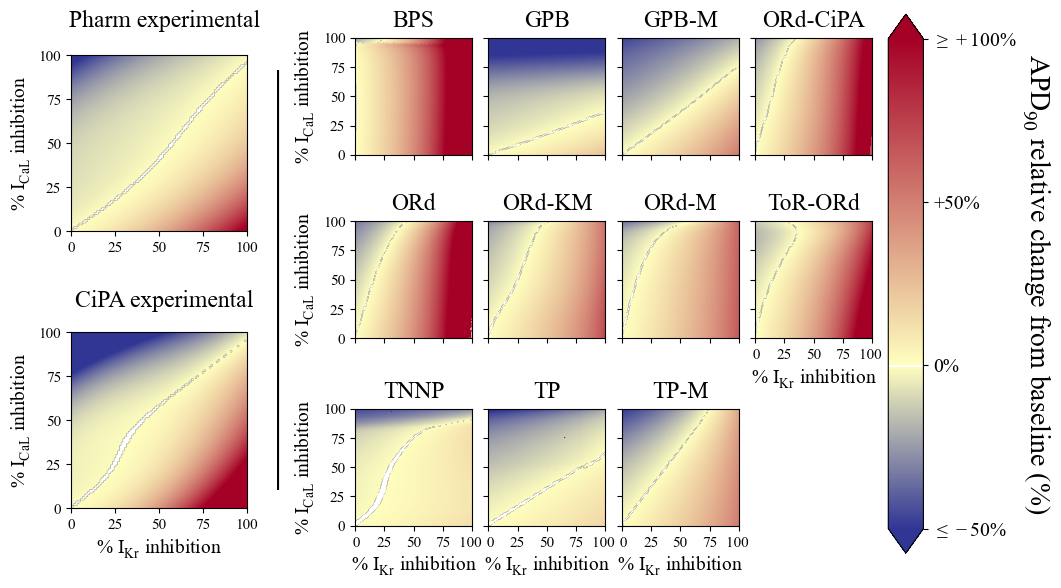

In [9]:
def cmap_percentage(cmin = -50, cmax = 100):
    # Prepare the color map 
    cmap = cm.get_cmap('RdYlBu_r', 500)

    # The cmap is an array with the colors
    color_min = cmap(0)
    color_max = cmap(500)
    pos_0 = -cmin/(cmax-cmin)
    color_0 = cmap(0.5)
    cmap = clrs.LinearSegmentedColormap.from_list('custom diverging', 
                                                 [(0,    color_min),
                                                  (pos_0, color_0),
                                                  (1,    color_max)], N=500)

    newcolors = cmap(np.linspace(0, 1, 500))
    index_0 = int(-cmin / (cmax-cmin) * 500)
    newcolors[index_0 - 1 : index_0 + 1] = [0, 0, 0, 0]
    newcmp = clrs.ListedColormap(newcolors)
    
    return newcmp
    
# Plot the 2D maps
def plot_2D_map_percentage(model, ax=None, cmin = -50, cmax = 100, xlabel=False, ylabel=False, write_model=False):
    # Axes to plot in
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Label axes
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks([0, 25, 50, 75, 100])
    if xlabel:
        ax.set_xlabel('I$_{Kr}$ inhibition in %', fontsize = 20)
    if ylabel:
        ax.set_ylabel('I$_{CaL}$ inhibition in %', fontsize = 20)

    # Flip the table so that the APD at baseline is in (0, 0)
    to_plot = np.flipud(np.fliplr(maps_2D[m]))
    APD_baseline = to_plot[0, 0]
    image=ax.imshow(100 * (to_plot - APD_baseline) / APD_baseline, cmap = cmap_percentage(), vmin = cmin, vmax = cmax)
    
    # Add the label of the model
    if write_model:
        t = ax.text(x=50, y = 85, s=model_labels[model], ha = 'center', va = 'center', fontsize = 10)
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))
        
    return image


# Adjust the colormap
cmax = 100
cmin = -50

# Plot all the maps in one figure
mosaic = [['Pharm exp', 'blank', model_labels[0], model_labels[1], model_labels[2], model_labels[3], 'legend'],
          ['Pharm exp', 'blank', model_labels[0], model_labels[1], model_labels[2], model_labels[3], 'legend'],
          ['Pharm exp', 'blank', model_labels[4], model_labels[5], model_labels[6], model_labels[7], 'legend'],
          ['CiPA exp', 'blank', model_labels[4], model_labels[5], model_labels[6], model_labels[7], 'legend'],
          ['CiPA exp', 'blank', model_labels[8], model_labels[9], model_labels[10], 'unused_0', 'legend'],
          ['CiPA exp', 'blank', model_labels[8], model_labels[9], model_labels[10], 'unused_0', 'legend']]

gs_kw = dict(width_ratios=[1.5, 0.65, 1, 1, 1, 1, 0.3], height_ratios=[0.9, 1, 1, 1, 1, 1])
fig, axes = plt.subplot_mosaic(mosaic, figsize = (11, 7), gridspec_kw=gs_kw, constrained_layout = False)
#fig, axes = plt.subplots(4, 4, figsize = (45, 40))

label_size = 14
tick_size = 11
tag_size = 17

# Add a separating line
ax = axes['blank']
ax.axis('off')

# new clear axis overlay with 0-1 limits
ax2 = plt.axes([0.312, 0.2, 0.1, 0.6], facecolor=(1,1,1,0))
line = Line2D([0, 0], [0, 1], linewidth=3, color='k', alpha=1)
ax2.add_line(line)
ax2.axis('off')


######
### EXPERIMENTAL
######
# Pharm
ax = axes['Pharm exp']

# Flip the table so that the APD at baseline is in (0, 0)
image=ax.imshow(surface_Pharm_percent, origin = 'lower', cmap = cmap_percentage(), vmin = -50, vmax = 100)

# Add the label
plt.figtext(0.21, 0.87, 'Pharm experimental', ha= 'center', va = 'center', fontsize = tag_size)

# Label axes
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.tick_params(labelsize = tick_size)
ax.set_ylabel('% $\mathregular{I_{CaL}}$ inhibition', fontsize = label_size)
    
# CiPA
ax = axes['CiPA exp']

# Flip the table so that the APD at baseline is in (0, 0)
image=ax.imshow(surface_CiPA_percent, cmap = cmap_percentage(), vmin = -50, vmax = 100)

# Add the label
plt.figtext(0.21, 0.47, 'CiPA experimental', ha= 'center', va = 'center', fontsize = tag_size)

# Label axes
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])
ax.tick_params(labelsize = tick_size)
ax.set_ylabel('% $\mathregular{I_{CaL}}$ inhibition', fontsize = label_size)
ax.set_xlabel('% $\mathregular{I_{Kr}}$ inhibition', fontsize = label_size)
    
######
### SIMULATED
######
for m, mod in enumerate(model_labels):
    # Define the axes
    ax = axes[mod]
    #ax = axes[m//4, m%4]
    
    # 2D map
    image = plot_2D_map_percentage(m, ax=ax, write_model = False)
    
    # Add the label of the model
    ax.text(x=50, y = 105, s=model_labels[m], ha = 'center', va = 'bottom', fontsize = tag_size)
    
    # Label axes
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_xticklabels(['', '', '', '', ''])
    ax.set_yticklabels(['', '', '', '', ''])
    ax.set_yticks([0, 25, 50, 75, 100])
    ax.tick_params(labelsize = tick_size)

    # Label first colum
    if m%4 == 0:
        ax.set_yticklabels([0, 25, 50, 75, 100])
        ax.set_ylabel('% $\mathregular{I_{CaL}}$ inhibition', fontsize = label_size)
    if m > len(model_labels)-5:
        ax.set_xticklabels([' 0', 25, 50, 75, '100 '])
        ax.set_xlabel('% $\mathregular{I_{Kr}}$ inhibition', fontsize = label_size)
        
# For unused axes
for m in range(len(model_labels), 12):
    ax = axes['unused_' + str(m - len(model_labels))]
    #ax = axes[m//4, m%4]
    ax.axis('off')

# Add the legend
ax = axes['legend']
norm = plt.Normalize(-50, 100)

sm =  ScalarMappable(norm=norm, cmap=cmap_percentage())
sm.set_array([])

cbar = fig.colorbar(sm, extend = 'both', cax = ax, shrink = 1)
cbar.set_ticks([-50, 0, 50, 100])
cbar.ax.set_yticklabels(['$\leq -$50%', '0%', '+50%', '$\geq +$100%'], fontsize = label_size)
cbar.set_label('APD$_{90}$ relative change from baseline (%)', rotation=270, fontsize = 20, labelpad = 25)

# Tight layout and save
#axes['ToR-ORd 2020'].set_in_layout(False)
#plt.tight_layout()
plt.subplots_adjust(wspace = 0.15)
plt.savefig('2-D maps of all models - percent of APD change.png', dpi = 300)
plt.savefig('2-D maps of all models - percent of APD change.pdf', format = 'pdf', transparent=True, bbox_inches = 'tight')
